In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [40]:
file1 = open('wonderland.txt', 'r')
txt = file1.read()

txt = txt.lower()

In [41]:
# REmoving Puncation
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(txt)[:10]

['alice',
 's',
 'adventures',
 'in',
 'wonderland',
 'alice',
 's',
 'adventures',
 'in',
 'wonderland']

In [42]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [43]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
from nltk import sent_tokenize
sentences = sent_tokenize(txt)

In [45]:
from nltk.tokenize import word_tokenize
tokens = word_tokenize(txt)

In [46]:
# Removing all tokens that are not alphabetic
words = [word for word in tokens if word.isalpha()]

In [47]:
words[:10]

['alice',
 'adventures',
 'in',
 'wonderland',
 'alice',
 'adventures',
 'in',
 'wonderland',
 'lewis',
 'carroll']

In [48]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
# Removing stop words

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]

In [50]:
# Stemming the words 
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stemmed = [porter.stem(word) for word in words]

Text is cleaned

In [51]:
stemmed[:10]

['alic',
 'adventur',
 'wonderland',
 'alic',
 'adventur',
 'wonderland',
 'lewi',
 'carrol',
 'millennium',
 'fulcrum']

In [52]:
final = stemmed

In [53]:
# Without stemming the words
words[:10]

['alice',
 'adventures',
 'wonderland',
 'alice',
 'adventures',
 'wonderland',
 'lewis',
 'carroll',
 'millennium',
 'fulcrum']

In [54]:
from collections import Counter
counts = Counter(words)

In [55]:
import itertools

# 1st few elements of Counts dictionary
dict(itertools.islice(counts.items(), 4))

{'adventures': 8, 'alice': 399, 'lewis': 1, 'wonderland': 4}

In [56]:
len(counts)

2369

We first divide the words into clusters that contain similar items and then try plotting them using TSNE. Then we embed them in hyperbolic space to see the plot

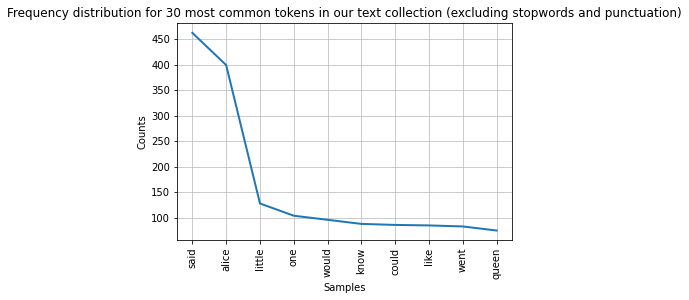

In [57]:
from nltk import FreqDist

fdist_filtered = FreqDist(words)
fdist_filtered.plot(10, title = 'Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)')

Not much info can be extracted using Frequency of words in a corpus.Thus, we look for Knowledge Graphs

In [58]:
import re # For preprocessing 
import pandas as pd # For data handling
from time import time # To time our operations
from collections import defaultdict # For word frequency

import spacy # For preprocessing

import logging # Set up loggings to monitor gensim
logging.basicConfig(format = "%(levelname)s - %(asctime)s: %(message)s", 
                   datefmt = '%H:%M:%S', level=logging.INFO)

Using a sentence tokenizer

In [59]:
from nltk import sent_tokenize

file1 = open('wonderland.txt', 'r')
txt = file1.read()
sentences = sent_tokenize(txt)

In [60]:
sentences[:3]

["Alice's Adventures in Wonderland\n\n                ALICE'S ADVENTURES IN WONDERLAND\n\n                          Lewis Carroll\n\n               THE MILLENNIUM FULCRUM EDITION 3.0\n\n\n\n\n                            CHAPTER I\n\n                      Down the Rabbit-Hole\n\n\n  Alice was beginning to get very tired of sitting by her sister\non the bank, and of having nothing to do:  once or twice she had\npeeped into the book her sister was reading, but it had no\npictures or conversations in it, `and what is the use of a book,'\nthought Alice `without pictures or conversation?'",
 'So she was considering in her own mind (as well as she could,\nfor the hot day made her feel very sleepy and stupid), whether\nthe pleasure of making a daisy-chain would be worth the trouble\nof getting up and picking the daisies, when suddenly a White\nRabbit with pink eyes ran close by her.',
 'There was nothing so VERY remarkable in that; nor did Alice\nthink it so VERY much out of the way to hear th

Now, we substitute new line characters (i.e., \n) with ' ' and remove stopwords

In [61]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import re

field = []

for line in sentences: 
    
    x = re.sub(r'\n',r' ',line)
    words = [w for w in str(x) if not w in stop_words]
    
    field.append(str(x))

In [62]:
field[:3]

["Alice's Adventures in Wonderland                  ALICE'S ADVENTURES IN WONDERLAND                            Lewis Carroll                 THE MILLENNIUM FULCRUM EDITION 3.0                                 CHAPTER I                        Down the Rabbit-Hole     Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do:  once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, `and what is the use of a book,' thought Alice `without pictures or conversation?'",
 'So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a daisy-chain would be worth the trouble of getting up and picking the daisies, when suddenly a White Rabbit with pink eyes ran close by her.',
 'There was nothing so VERY remarkable in that; nor did Alice think it so VERY much out of the way to hear the Rabbit say to itself, `

Now, we store the filtered data in a new dataframe

In [63]:
df = pd.DataFrame(field)

In [64]:
df.head()

,0
0,Alice's Adventures in Wonderland ...
1,So she was considering in her own mind (as wel...
2,There was nothing so VERY remarkable in that; ...
3,Oh dear!
4,I shall be late!'


In [65]:
df.isnull().sum()

0    0
dtype: int64

In [66]:
df_clean = df.drop_duplicates()

In [67]:
df_clean.shape

(1565, 1)

In [68]:
from gensim.models.phrases import Phrases, Phraser

In [69]:
sent = df_clean
sent.head()

,0
0,Alice's Adventures in Wonderland ...
1,So she was considering in her own mind (as wel...
2,There was nothing so VERY remarkable in that; ...
3,Oh dear!
4,I shall be late!'


In [71]:
sent[0]

0       Alice's Adventures in Wonderland              ...
1       So she was considering in her own mind (as wel...
2       There was nothing so VERY remarkable in that; ...
3                                                Oh dear!
4                                       I shall be late!'
                              ...                        
1611    But her sister sat still just as she left her,...
1612    The long grass rustled at her feet as the Whit...
1613    So she sat on, with closed eyes, and half beli...
1614    Lastly, she pictured to herself how this same ...
1615                                              THE END
Name: 0, Length: 1565, dtype: object

In [36]:
phrases = Phrases(sent[0], min_count=30, progress_per = 10000)
bigram = Phraser(phrases)

INFO - 04:50:31: collecting all words and their counts
INFO - 04:50:31: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 04:50:31: collected 1261 word types from a corpus of 142924 words (unigram + bigrams) and 1565 sentences
INFO - 04:50:31: using 1261 counts as vocab in Phrases<0 vocab, min_count=30, threshold=10.0, max_vocab_size=40000000>
INFO - 04:50:31: source_vocab length 1261
INFO - 04:50:31: Phraser built with 0 phrasegrams


In [37]:
sentences = bigram[sent[0]]

In [38]:
sentences[:3]

["Alice's Adventures in Wonderland                  ALICE'S ADVENTURES IN WONDERLAND                            Lewis Carroll                 THE MILLENNIUM FULCRUM EDITION 3.0                                 CHAPTER I                        Down the Rabbit-Hole     Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do:  once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, `and what is the use of a book,' thought Alice `without pictures or conversation?'",
 'So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a daisy-chain would be worth the trouble of getting up and picking the daisies, when suddenly a White Rabbit with pink eyes ran close by her.',
 'There was nothing so VERY remarkable in that; nor did Alice think it so VERY much out of the way to hear the Rabbit say to itself, `

In [70]:
from nltk.tokenize import word_tokenize

tokenized_sentences=[]

for s in sentences:
    
    tokenized_sentences.append(word_tokenize(s.lower()))

# Tokenizing words within the Sentences
tokenized_sentences[:3]

[['alice',
  "'s",
  'adventures',
  'in',
  'wonderland',
  'alice',
  "'s",
  'adventures',
  'in',
  'wonderland',
  'lewis',
  'carroll',
  'the',
  'millennium',
  'fulcrum',
  'edition',
  '3.0',
  'chapter',
  'i',
  'down',
  'the',
  'rabbit-hole',
  'alice',
  'was',
  'beginning',
  'to',
  'get',
  'very',
  'tired',
  'of',
  'sitting',
  'by',
  'her',
  'sister',
  'on',
  'the',
  'bank',
  ',',
  'and',
  'of',
  'having',
  'nothing',
  'to',
  'do',
  ':',
  'once',
  'or',
  'twice',
  'she',
  'had',
  'peeped',
  'into',
  'the',
  'book',
  'her',
  'sister',
  'was',
  'reading',
  ',',
  'but',
  'it',
  'had',
  'no',
  'pictures',
  'or',
  'conversations',
  'in',
  'it',
  ',',
  '`',
  'and',
  'what',
  'is',
  'the',
  'use',
  'of',
  'a',
  'book',
  ',',
  "'",
  'thought',
  'alice',
  '`',
  'without',
  'pictures',
  'or',
  'conversation',
  '?',
  "'"],
 ['so',
  'she',
  'was',
  'considering',
  'in',
  'her',
  'own',
  'mind',
  '(',
  'as',


Creating Knowledge graphs

In [72]:
import re
import pandas as pd
import bs4
import requests
import spacy

import networkx as nx
import matplotlib.pyplot as plt

from spacy import displacy
from spacy.matcher import Matcher
from spacy.tokens import Span
from tqdm import tqdm

nlp = spacy.load('en_core_web_sm')

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [73]:
# import wikipedia sentences
candidate_sentence = pd.DataFrame(sentences)

In [74]:
candidate_sentence.head()

,0
0,Alice's Adventures in Wonderland\n\n ALICE'S ADVENTURES IN WONDERLAND\n\n Lewis Carroll\n\n THE MILLENNIUM FULCRUM EDITION 3.0\n\n\n\n\n ...
1,"So she was considering in her own mind (as well as she could,\nfor the hot day made her feel very sleepy and stupid), whether\nthe pleasure of making a daisy-chain would be worth the trouble\nof g..."
2,"There was nothing so VERY remarkable in that; nor did Alice\nthink it so VERY much out of the way to hear the Rabbit say to\nitself, `Oh dear!"
3,Oh dear!
4,I shall be late!'


In [75]:
candidate_sentence[0].sample(5)

487     Alice thought she might as well wait, as she had nothing else\nto do, and perhaps after all it might tell her something worth\nhearing.
1256                                                                       Will you, won't you, will you, won't you, won't you join the\ndance?
285                                                              Alice called after\nit; and the others all joined in chorus, `Yes, please do!'
616                                                                                                     `That's the\nfirst question, you know.'
912                                                         Once more she found herself in the long hall, and close to the\nlittle glass table.
Name: 0, dtype: object

### Sentence segmentation

We shortlist only those sentences in which there is exactly 1 subject and 1 object

In [76]:
doc = nlp('the drawdown process is governed by astm standard d823')

for tok in doc:
    
    print(tok.text, "...", tok.dep_)

the ... det
drawdown ... compound
process ... nsubjpass
is ... auxpass
governed ... ROOT
by ... agent
astm ... compound
standard ... pobj
d823 ... punct


Function to extract subject and object (entities) from a sentence while also overcoming challenges such as getting nodes and edges between them.
Have divided the code into multiple chunks for easy understanding.
We will extract these elements in an unsupervised manner i.e., we will use the grammar of the sentences

In [77]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

For example ...

In [78]:
get_entities("the film had 200 patents")

['film', '200  patents']

### Extracting Entities from Corpus:

In [79]:
entity_pairs = []

for i in tqdm(candidate_sentence[0]):
  entity_pairs.append(get_entities(i))

100%|██████████| 1616/1616 [00:17<00:00, 90.21it/s] 


Nodes are extracted
Now , we need EDGES i.e. Relation between the Nodes

In [97]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", [pattern]) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

In [98]:
get_relation("I just finished my breakfast")

'finished'

### Extracting Relations from Corpus

In [106]:
relations = [get_relation(i) for i in tqdm(candidate_sentence[0])]



  0%|          | 0/1616 [00:00<?, ?it/s]

  0%|          | 5/1616 [00:00<00:35, 45.72it/s]

  1%|          | 10/1616 [00:00<00:38, 41.61it/s]

  1%|          | 16/1616 [00:00<00:32, 48.83it/s]

  1%|▏         | 22/1616 [00:00<00:30, 52.03it/s]

  2%|▏         | 28/1616 [00:00<00:30, 52.72it/s]

  2%|▏         | 34/1616 [00:00<00:29, 53.48it/s]

  3%|▎         | 41/1616 [00:00<00:27, 57.91it/s]

  3%|▎         | 48/1616 [00:00<00:26, 59.62it/s]

  3%|▎         | 54/1616 [00:01<00:29, 52.95it/s]

  4%|▎         | 60/1616 [00:01<00:30, 51.77it/s]

IndexError: ignored

In [92]:
pd.Series(relations).value_counts()[:5]

NameError: ignored

## Building a Knowledge graph

In [ ]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [ ]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())

In [ ]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

This can be much better represented in Hyperbolic Space.

### Checking the graphs for different words

In [ ]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="thought"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes

#pos = graphviz_layout(G, prog="twopi", args = "") #for circular graph
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [ ]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="like"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [ ]:
G.degree

In [ ]:
G.edges()

In [ ]:
L = G.number_of_nodes()
L

## Poincare Embeddings (GENSIM)

In [ ]:
!pip install --upgrade gensim

In [ ]:
from gensim.models.poincare import PoincareRelations
from gensim.models.poincare import PoincareModel
from gensim.models import KeyedVectors

In [ ]:
entity_pairs[:10]

In [ ]:
# Size is required for 2d plotting
model = PoincareModel(entity_pairs, negative = 4)

In [ ]:
model.train(epochs = 100)

## Visualizing the poincare embedding

In [ ]:
from gensim.viz import poincare
import gensim

In [ ]:
relations[:10]

In [ ]:
from gensim.models import KeyedVectors
# from gensim.test.utils import lee_corpus_list
from gensim.models import Word2Vec
result = model.kv.most_similar("Alice")

In [ ]:
result

In [ ]:
model

In [ ]:
fig = gensim.viz.poincare.poincare_2d_visualization(model,tuple(entity_pairs), 'Exp', num_nodes = 10, show_node_labels = ())

# Error since the model does not have a dimensionality 2

In [ ]:
model.kv.syn0

In [ ]:
model.kv.distance("Alice", "little")

In [ ]:
entity_pairs[:10]

In [ ]:
# model in 2D
model = PoincareModel(entity_pairs, negative = 4, size = 2)

In [ ]:
from gensim.models.poincare import PoincareRelations
from gensim.test.utils import datapath


relation_gensim = PoincareRelations(model)

import plotly

import gensim.viz.poincare

plotly.offline.init_notebook_mode(connected = False)

fig = gensim.viz.poincare.poincare_2d_visualization(model = model, 
                                           tree = entity_pairs, 
                                           figure_title = "Poincare model Visualization in 2D",
                                           )

plotly.offline.iplot(fig)

In [ ]:
model.kv.closest_child("Alice")

In [ ]:
new_model = PoincareModel(train_data = entity_pairs,
                          size = 2,
                          burn_in = 0,
                          workers = 1,
                          negative = 10)

# Difference with the previous implementation: burn_in initialization

# Older Model training step done : 
# model = PoincareModel(entity_pairs, negative = 4, size = 2)

new_model.train(epochs = 100, print_every = 400, batch_size = 10)

In [ ]:
from gensim.viz.poincare import poincare_2d_visualization, poincare_distance_heatmap

fig = poincare_2d_visualization(
    new_model,
    entity_pairs,
    "Poincare Hierarchy",
    show_node_labels=entity_pairs)

In [ ]:
fig

## Plotting using TSNE

In [ ]:
new_model_without_2d = PoincareModel(train_data = entity_pairs,
                          burn_in = 0,
                          workers = 1,
                          negative = 10)

new_model_without_2d.train(epochs = 100, print_every = 400, batch_size = 10)

In [ ]:
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

tsne_model = TSNE(n_components = 3, verbose = 1, random_state = 0, angle = .99, init = 'pca', perplexity = 40)

tsne_poincare = tsne_model.fit_transform(new_model_without_2d.kv[new_model_without_2d.kv.vocab])

In [ ]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

#fog = plt.scatter(tsne_poincare[:, 0], tsne_poincare[:, 1],tsne_poincare[:, 2], cmap = 'RdBu')

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection="3d")

#ax.scatter3D(*zip(*tsne_poincare))
sctt = ax.scatter3D(tsne_poincare[:, 0], tsne_poincare[:, 1],tsne_poincare[:, 2],
            alpha = 0.8,
            cmap = plt.get_cmap('hsv'),
            marker = '^')

fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
plt.show()
plt.show()

Checking the Vocabulary

In [ ]:
dict(itertools.islice(model.kv.vocab.items(), 3)) 

In [ ]:
model.kv[model.kv.vocab]

In [ ]:
import plotly.express as px

fig = plt.figure(figsize = (20, 20))
fig = px.scatter_3d(df, x=tsne_poincare[:, 0], y=tsne_poincare[:, 1], z=tsne_poincare[:, 2],
                    color= tuple(new_model_without_2d.kv.vocab),
                    title="3D Scatter Plot")

fig.show()

Checking the Vocabulary of the model created (More than 2 Dimensions)

In [ ]:
dict(itertools.islice(new_model_without_2d.kv.vocab.items(), 3)) 

### Creating a Model for Most similar words to 'Alice' as per the current corpus (or Vocab)

In [ ]:
x = new_model_without_2d.kv.most_similar('Alice', topn = 10)
x

Object of Vectors that are closest to 'Alice'

In [ ]:
new_model_without_2d.kv.vocab['Alice']

Zipping up the x object to separate Words and the Gensim Keyed Vectors

In [ ]:
alice = list(zip(*x))

In [ ]:
alice[0]

In [ ]:
#Extracting a single word
alice[0][0]

In [ ]:
#Plotting words closest to 'Alice'
new_model_without_2d.kv.vocab[alice[0][9]]

In [ ]:
#new_model_without_2d.kv.vocab[alice[0]]

x = {}
for i in range(10):
    
    print(alice[0][i])
    print(new_model_without_2d.kv.vocab[alice[0][i]])
    
    #x.append([alice[0][i],new_model_without_2d.kv.vocab[alice[0][i]]])
    x[alice[0][i]] = new_model_without_2d.kv.vocab[alice[0][i]]

In [ ]:
tsne_poincare = tsne_model.fit_transform(new_model_without_2d.kv[x])

Displaying them in 3D via Plotly

In [ ]:
fig = plt.figure(figsize = (20, 20))

fig = px.scatter_3d(df, x=tsne_poincare[:, 0], y=tsne_poincare[:, 1], z=tsne_poincare[:, 2],
                    color= tuple(x),
                    title="3D Scatter Plot")


fig.show()